In [16]:
import os
import pandas as pd
import numpy as np
import re

import time
from tqdm import tqdm
import datetime as dt
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
py.offline.init_notebook_mode(connected=True)

pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns", 500)

# Loading data from json and creating DataFrame

In [10]:
def read_data(file = 'json_file_location.json'):
    """
    Function to load single json files
    """
    
    data_frame = pd.read_json(file, 
                               orient='records', 
                               lines=True, 
                               convert_dates=True, 
                               keep_default_dates=True)
    return data_frame



def cleaning(df):
    """
    Creates a dataframe with distinct columns only and only german tweets; 
    defines a datetime index and sorts in an ascending manner; 
    also, deletes duplicates in the text column
    """
    
    
    ger_df = df.loc[:, ['created_at', 'id_str', 'full_text']][df.lang == 'de']
    ger_df = ger_df.set_index(pd.DatetimeIndex(ger_df['created_at'], inplace=True)).sort_values('created_at', ascending=True)
    
    clean_ger_df = ger_df.drop_duplicates('full_text')

    assert len(clean_ger_df) == (len(ger_df) - ger_df.duplicated('full_text').sum())
    
    return ger_df

In [11]:
def load_data(file_list):
    """
    Function that loads json files from a list of files, using the read_data function,
    and appends the resulting pandas DataFrames to each other
    """
    
    df = pd.DataFrame()
    
    for file in tqdm(file_list):
        if os.path.isfile(file):
            sub_df = cleaning(read_data(file))
        else:
            print('File {} not found'.format(file))
            continue
        if df.empty:
            df = sub_df
        else:
            df = df.append(sub_df)
            
    return df

In [21]:
df = read_data('/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data_test/AfD/AfD_2018-08-08.json')

In [22]:
print(df.head(1))
print(df.tail(1))
print(df.shape)

   contributors  coordinates          created_at display_text_range  \
0           NaN          NaN 2018-08-08 23:59:43           [0, 140]   

                                                                                                                                                                                      entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'AfD', 'name': 'Alternative für 🇩🇪 Deutschland', 'id': 844081278, 'id_str': '844081278', 'indices': [3, 7]}], 'urls': []}   

  extended_entities  favorite_count  favorited  \
0               NaN               0      False   

                                                                                                                                       full_text  \
0  RT @AfD: ++ Appell an alle Landsleute: Syrer kehrt nun heim! ++\nIn weiten Teilen Syriens herrscht Frieden. Zeit, die 🧳Koffer zu packen. Die…   

   geo                   id               id_str in_reply_to_screen_na

In [14]:
read_in = False
path = '/home/franzi/Git-DSR/Twitter_sentimentanalysis/Data/all_data_c.pickle'
if read_in:
    parties = ['AfD', 'SPD', 'CDU', 'CSU', 'FDP', 'LINKE', 'Gruene']
    dates = ['08-03', '08-04']
    data = {}
    print('Loading: {}'.format(dates))
    for party in parties:
        load_list = ['../Data_old/{}/{}_2018-{}.json'.format(party, party, day) for day in dates]
        data[party] = load_data(load_list)
        print('{} loaded'.format(party))
    with open(path, 'wb') as fid:
        pickle.dump(data, fid)
else:
    print('loading data from pickle')
    with open(path, 'rb') as fid:
        data = pickle.load(fid)
        print('data loaded')

loading data from pickle
data loaded


In [15]:
data['AfD'].head()

,created_at,id_str,text
created_at,,,
2018-08-03 15:37:51,2018-08-03 15:37:51,1025405391642025984,RT @Eckleben: #Aufstehen? von Sarah #Wagenknecht|s #Sammlungsbewegung macht mich frösteln. Da fischt doch jemand an allen Rändern diese Lan…
2018-08-03 15:37:53,2018-08-03 15:37:53,1025405401637052416,"RT @bandee_de: ""Ein Großteil der Befragten ist mit der Gesundheits-, Renten- und #Sozialpolitik unzufrieden. Die Union fällt unter 30 Proze…"
2018-08-03 15:38:01,2018-08-03 15:38:01,1025405436038733824,"RT @antifa_catering: #Seehofer will twittern? Der Typ soll sich mal warmlaufen, damit er den Shitstorms entkommen kann. Kleiner Hinweis: Re…"
2018-08-03 15:38:01,2018-08-03 15:38:01,1025405434587480064,"RT @Joerg_Meuthen: War das schon vor 5, 10 oder 20 Jahren nötig?\nWer hatte in den letzten 13 Jahren die Kanzlerschaft und damit die Verantw…"
2018-08-03 15:38:06,2018-08-03 15:38:06,1025405457161244672,"@DirkSpaniel @DerSPIEGEL Hm, vielleicht schauen wir uns mal die Anzahl der Vorstrafen von mittigen AfD Politiker an?!?"


In [ ]:
colors = ['b', 'r', 'g']
for party, color in zip(parties, colors):
    print(data[party].iloc[0].text, color)

# Quick excursion: Time series of tweets per minute

Count all tweets per minute and plot the tweetcount against time

In [ ]:
# def plot_timeseries(df):
#     tweetcount_df = df.loc[:, 'text'].resample('min').count()
    
#     tweetcount_df.plot(figsize=(30, 7.5), color='b', )
#     print('hurray, first plot')

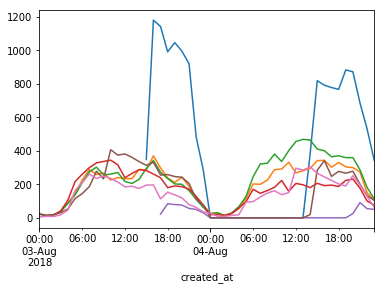

In [21]:
plt.figure()
ax = plt.axes()
for party in parties:
    data[party].loc[:, 'text'].resample('h').count().plot(ax=ax)
plt.show()

In [ ]:
def tweetcount(df):
    tweetcount_df = pd.DataFrame(df.loc[:, 'text'].resample('h').count())
    return tweetcount_df

In [ ]:
tweetcount_AFD = tweetcount(clean_df_AFD)

In [ ]:
tweetcount_SPD = tweetcount(clean_df_SPD)

In [ ]:
tweetcount_CDU = tweetcount(clean_df_CDU)

In [ ]:
tweetcount_CSU = tweetcount(clean_df_CSU)

In [ ]:
tweetcount_FDP = tweetcount(clean_df_FDP)

In [ ]:
tweetcount_LINKE = tweetcount(clean_df_LINKE)

In [ ]:
tweetcount_Gruene = tweetcount(clean_df_Gruene)


In [ ]:
# Make data and layout objects
import plotly.graph_objs as go

AFD = go.Scatter(   # Initialize the scatter trace object                         
        y = tweetcount_AFD.loc[:, 'text'],    # Reference between trace's x coord. and x axis
        x = tweetcount_AFD.index,    # Reference between trace's y coord. and y axis
        line = dict(
        color = ('rgb(26, 124, 199)')),
        name = 'AfD') # Mode of the scatter trace object (lines, text)

SPD = go.Scatter(   
       y = tweetcount_SPD.loc[:, 'text'],    
       x = tweetcount_SPD.index,    
       line = dict(
       color = ('rgb(210, 0, 0)')),
        name = 'SPD')    

CDU = go.Scatter(  
       y = tweetcount_CDU.loc[:, 'text'],    
       x = tweetcount_CDU.index,    
       line = dict(
       color = ('rgb(0, 29, 77)')),
       name = 'CDU')

CSU = go.Scatter(   
       y = tweetcount_CSU.loc[:, 'text'],   
       x = tweetcount_CSU.index,   
       line = dict(
       color = ('rgb(26, 117, 255)')),
        name = 'CSU')

LINKE = go.Scatter(   
       y = tweetcount_LINKE.loc[:, 'text'],    
       x = tweetcount_LINKE.index,    
       line = dict(
       color = ('rgb(204, 0, 102)')),
        name = 'Linke')

FDP = go.Scatter(   
       y = tweetcount_FDP.loc[:, 'text'],    
       x = tweetcount_FDP.index,    
       line = dict(
       color = ('rgb(255, 204, 0)')),
       name = 'FDP')

Gruene = go.Scatter(  
       y = tweetcount_Gruene.loc[:, 'text'],   
       x = tweetcount_Gruene.index,   
       line = dict(
       color = ('rgb(0, 204, 0)')),
        name = 'Grüne')


data = [AFD, SPD, CDU, CSU, LINKE, FDP, Gruene] # Create data list-like object of 2 traces
 
layout = go.Layout(title='Party tweet-count per hour',
                  yaxis = dict(title='Tweets per hour'),
                  xaxis = dict(title='Time'),
                  ) # Set the figures title

In [ ]:
hourly_tweetcount = go.Figure(data=data, layout=layout)

In [ ]:
py.offline.iplot(hourly_tweetcount)

In [ ]:
config = dict(modeBarButtonsToRemove=['sendDataToCloud'],
              displaylogo=False,
              fillFrame=True)  

div_str = py.offline.plot(hourly_tweetcount,
                          output_type='div', 
                          include_plotlyjs=False,
                          show_link=False,
                          config=config)

In [ ]:
# Insert the code in the page template
html_str = '''<!DOCTYPE html>
                <html>
                
                <head>
                  <script src="https://d3js.org/d3.v3.min.js"></script>
                  <script src='https://cdn.plot.ly/plotly-latest.min.js'></script>
                </head>
                
                
                <body>
                  <h1>Simple Dashboard</h1>
                  <p>The following plot is static and interactive at the same time ;)</p>
                
                  {}
                
                </body>
                
                </html>
                '''.format(div_str)

# The resulting string can be saved in a file
with open('simple_dashboard.html', 'w') as f:
    f.write(html_str)

# Feature extraction and first clustering - 'quick and dirty'
1. Vectorize the raw tweets
2. Clustering
3. Reduce the dimension (PCA)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
vectorizer  = CountVectorizer()
text = (clean_df_AFD.loc[:, 'text']).tolist()
X = vectorizer.fit_transform(text)

In [ ]:
clsf = KMeans(n_clusters=2, random_state=123).fit(X)

# Extract hashtags and party mentions

In [ ]:
text_cleaner = lambda x: " ".join(re.findall(r"[A-Za-z0-9üäöÜÄÖß#@ ]*", x))    

In [ ]:
clean_df_AFD['clean_text'] = clean_df_AFD['text'].apply(text_cleaner)

clean_df_AFD.info()
clean_df_AFD['clean_text'].astype('str')

In [ ]:
tag_finder = lambda x: re.findall(r"#(\w+)", x)
tag_remover = lambda x: re.sub("#(\w+)", '', x)

In [ ]:
clean_df_AFD['tags'] = clean_df_AFD['text'].apply(tag_finder)
clean_df_AFD['clean_text'] = clean_df_AFD['text'].apply(text_cleaner).apply(tag_remover)

In [ ]:
clean_df_AFD.head(5) #e.g. afrikanischen - look at this again!

In [ ]:
parties = ['CDU', 'CSU', 'afd', 'SPD', 'Grüne', 'Linke', 'FDP', 'Gruene'] 
            
party_finder = lambda x: re.findall((parties[2]), x, re.IGNORECASE) # does not yet work as planned

In [ ]:
clean_df_AFD['parties'] = clean_df_AFD['clean_text'].apply(party_finder)

In [ ]:
clean_df_AFD.head(5)